# Encontro 8: Centro e Periferia

In [1]:
import sys
sys.path.append('..')

import numpy as np
import pandas as pd
import seaborn as sns

import socnet as sn

from scipy.stats.stats import pearsonr
from scipy.optimize import minimize

%matplotlib inline

## Inovação no Jazz: no Centro ou na Periferia?

Nesta atividade, vamos explorar onde surgem as inovações no Jazz. O período de análise inclui os anos 50 e 60 do século passado, quando músicos como Dave Brubeck e Miles Davis ficaram extremamente famosos. 

De onde vem as inovações? São tantas as possibilidades! Será que o artista genial tem uma personalidade distinta? Será que a estrutura neurológica de seu cérebro produz acordes dissonantes e improvisações geniais? Será que escutou uma britadeira quando era pequeno e com isso obteve inspiração para um novo ritmo? De que forma sua história de vida conta? É importante que seus pais tenham lhe incentivado? Será que é importante ter sido órfão e ganhar sustento como trombonista na bandinha da cidade?

São tantas as possíveis explicações! Possivelmente são infinitas as explicações e por isso nunca poderíamos ficar satisfeitos, certo? Errado: o trabalho científico precisa assumir que não conhecerá tudo sobre um fenômeno, mas ainda assim buscar o que for possível e relevante. Toda investigação científica necessita de alguma forma iniciar com o contexto, com as teorias conhecidas e delinear os principais mecanismos que se espera que estejam em operação para explicar o fenômeno.


### Scaffold 1: Entendimento do Contexto e Delineamento dos Mecanismos

Nesse estudo, tomaremos algumas decisões de redução do contexto para alguns mecanismos específicos. Em primeiro lugar, não nos importará a biografia do músico: não iremos ler a biografia de cada músico inovador. Ainda assim, poderemos em algum momento tentar capturar um pouco dessa história de vida a partir de variáveis como *gênero*, *idade*, *raça* e *local de nascimento*. De forma análoga, não iremos nos deter em variáveis que não podemos observar ou só podemos observar a alto custo, como a personalidade e minúcias da vida do artista.

A *localização* do artista pode ser extremamente interessante: será que é importante que o artista esteja tocando em Nova Iorque ou em Bruxelas? Sabemos que Nova Iorque foi e ainda é o principal centro de produção de Jazz no mundo. Então poderíamos também indagar se faria diferença verificar quais artistas frequentavam os principais clubes no SoHo, ou as sessões de improvisação no Harlem.

Mas por que assumimos que *geografia*, *espaço* e *local* são importantes? São importantes porque os artistas conhecem novos estilos ao encontrar face-a-face com outros músicos. Desta forma, são capazes de ter acesso direto a essas músicas, muito antes que alcancem as estações de rádio e os estúdios de gravação. A partir da ideia de que o contato direto entre os músicos é condição importante para a troca de informações, aprendizado mútuo, podemos dar um passo adicional e afirmar que o que realmente importa para um músico é a sua posição na rede de relacionamentos no mundo do Jazz.

A ideia de que inovação no jazz está relacionada com a posição do músico no mundo do Jazz é uma proposição interessante, mas ainda muito genérica para poder ser transformada em uma hipótese testável. A ideia de *posição* pode ser definida de muitas formas, pode estar associada a muitos mecanismos distintos, e pode ser operacionalizada de formas múltiplas. Possivelmente a intuição de posição é uma das mais populares em Análise de Redes Sociais e por isso o "mercado de ideias" sobre como definir essa intuição esteja tão abarrotado de propostas.

Entre as diversas possibilidades de entendimento do que significa posição, assumiremos um pressuposto importante: para caracterizar um indivíduo, precisamos pensar em qual *região* da rede ele pertence. Geralmente, em um mundo artístico, os padrões de relacionamento entre os músicos formam uma rede com um *centro* com membros altamente relacionados entre si e uma *periferia* na qual os membros se relacionam com o centro mas não entre si. Podemos observar esse fenômeno em outros contextos também: lembra da rede dos usuários que o Trump segue no Twitter? Vários *pundits* eram periféricos.

O surgimento de um centro se dá por várias razões, incluindo o *Efeito Mateus* que vimos na primeira aula no contexto de citações. Por motivos de simplificação, pensaremos em apenas duas regiões um centro e uma periferia, embora modelos mais complexos, como por exemplo modelos de múltiplos centros, sejam possíveis. Precisamos ainda de um pressuposto adicional: o centro de uma rede é onde o “burburinho” ocorre. Esses dois pressupostos são razoáveis: é plausível que o centro de uma rede seja onde haja mais densidade de relações, e também assumimos que mesmo que um indivíduo não seja particularmente bem conectado, basta que ele pertença ao centro para estar exposto a esse “caldo criativo”.

Entretanto, sem abandonar essa abordagem de “centro e periferia”, poderíamos também argumentar de forma plausível que inovações surgem na periferia do mundo do jazz em vez do centro. Se o sucesso comercial exige que os músicos centrais sigam certos padrões consagrados, apenas músicos periféricos são livres (Ou irrelevantes? Ou insignificantes?) o suficiente para testarem soluções novas. Eles não têm muito a perder, certo? 

Nos parágrafos acima exploramos o contexto do jazz e, de forma bastante informal, identificamos alguns mecanismos que poderiam explicar o surgimento de inovações. Na próxima seção, adotaremos uma abordagem mais formal para traduzir mecanismos a hipóteses.


### Scaffold 2: Tradução dos Mecanismos em Hipóteses

Músicos presentes no centro da rede têm mais acesso a outros músicos do jazz, e isso os leva a conhecer novos estilos de forma mais rápida. Esse acesso privilegiado possibilita o aprendizado mais rápido de novos estilos e rápida recombinação de elementos musicais. A recombinação de elementos musicais leva à emersão de novos estilos e inovações. Logo:

> Hipótese 1: músicos no centro da rede apresentam maiores chances de inovar

Em contrapartida, músicos na periferia tem menor pressão para se conformar aos padrões estabelecidos pela Indústria Fonográfica e pela comunidade de músicos. Desta forma, são mais livres para experimentar novas combinações artísticas. Assim:

> Hipótese 2: músicos na periferia da rede apresentam maiores chances de inovar

Eu sei o que vocês estão pensando: peraí, que migué é esse? Fazer um conjunto de hipóteses que cobrem todo o universo de possibilidades é fácil!

Mas não foi isso o que fizemos! Repare que:

* ambas as hipóteses são sustentadas por argumentos coerentes com o contexto apresentado; e
* elas **NÃO** cobrem todo o universo de possibilidades. Ambas podem estar erradas, por exemplo.

Mas eu concordo com uma coisa: a formulação ainda não está completa. Para estar completa, precisa de uma formalização do que é centro, uma formalização do que é periferia e uma formalização de que grandezas esperamos estar relacionadas.

Em dado momento, os professores vão fazer uma exposição sobre o conceito de *coreness*. Use o espaço abaixo para anotações.

### Scaffold 3: Operacionalização e Teste das Hipóteses

In [2]:
def cost(c, A):
    row = np.matrix(c)

    C = np.multiply(row.transpose(), row)

    correlation, _ = pearsonr(C.flat, A.flat)

    return -correlation


def write_coreness(g):
    length = g.number_of_nodes()

    c = np.random.rand(length)

    A = sn.build_matrix(g)

    bounds = [(0, 1) for _ in range(length)]

    result = minimize(cost, c, args=(A,), bounds=bounds)

    norm = 0

    for i, n in enumerate(g.nodes):
        g.nodes[n]['coreness'] = result['x'][i]

        norm += g.nodes[n]['coreness'] ** 2

    for n in g.nodes:
        g.nodes[n]['coreness'] /= norm

Dados disponíveis:
* as redes cobrem os períodos de 1930 a 1969 e estão separados por ano;
* os nós são artistas e existe uma aresta entre dois artistas se eles participaram de uma mesma sessão de gravação;
* cada nó tem um atributo `sessions` que indica de quantas sessões ele participu e um atributo `innovats` que indica de quantas sessões *iovadoras* ele participou.
* cada aresta possui um peso que é inversamente proporcional ao tamanho das sessões.

In [3]:
# year = 1950
# g = sn.load_graph('graphs/{0}.gml'.format(year))
# sns.distplot([g.nodes[n]['sessions'] for n in g.nodes], kde=False);

In [4]:
# innovats_dict = {}
# for i in range(1930, 1970):
#     year = i
#     g = sn.load_graph('graphs/{0}.gml'.format(year))
#     sg = g.copy()

#     nodes = list(sg.nodes)
    
#     total_innovats = 0
#     for n in nodes:
#         total_innovats = total_innovats + sg.nodes[n]['innovats']
#     innovats_dict[year] = total_innovats

In [5]:
#Rodando a primeira vez, descobrimos que os anos interessantes são 1953 a 1968
# innovats_dict

Por simplicidade, vou remover da rede os artistas que participaram de poucas sessões.

In [6]:
graphs_dict = {}
for i in range(1953, 1969):
    year = i
    g = sn.load_graph('graphs/{0}.gml'.format(year))
    sg = g.copy()

    nodes = list(sg.nodes)

    for n in nodes:
        if sg.nodes[n]['sessions'] < 10:
            sg.remove_node(n)
    graphs_dict[year] = sg

# sns.distplot([sg.nodes[n]['sessions'] for n in sg.nodes], kde=False);

Agora estamos prontos para calcular o coreness.

In [7]:
for graph in graphs_dict:
    write_coreness(graphs_dict[graph])

### Verificando relação

In [13]:
dataframes_dict = {}
for year in graphs_dict:
    sg = graphs_dict[year]
    dataframes_dict[year] = pd.DataFrame({
        'coreness': [sg.nodes[n]['coreness'] for n in sg.nodes],
        'innovats': [sg.nodes[n]['innovats'] for n in sg.nodes],
        'sessions': [sg.nodes[n]['sessions'] for n in sg.nodes],
        'innovats/sessions': [sg.nodes[n]['innovats']/sg.nodes[n]['sessions'] for n in sg.nodes],
        'year': [year for n in sg.nodes]
    })


In [26]:
data_corr = pd.DataFrame({
    'year': [year for year in dataframes_dict.keys()],
    'correlation': [data['innovats/sessions'].corr(data.coreness) for data in dataframes_dict.values()]
})


In [27]:
data_corr

,year,correlation
0,1953,-0.115553
1,1954,-0.153037
2,1955,-0.173301
3,1956,0.039457
4,1957,0.168973
5,1958,0.034840
6,1959,0.073503
7,1960,-0.128386
8,1961,0.627210
9,1962,0.008441


/home/tirta/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



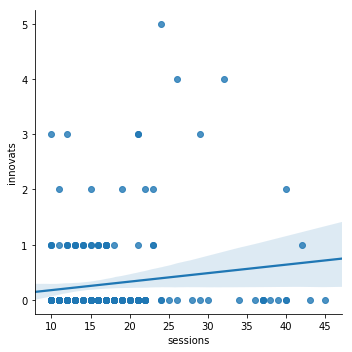

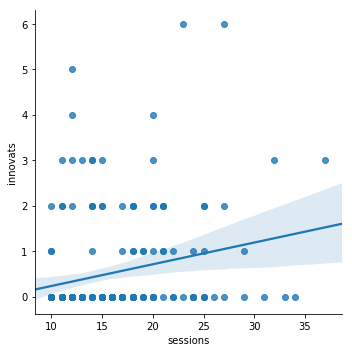

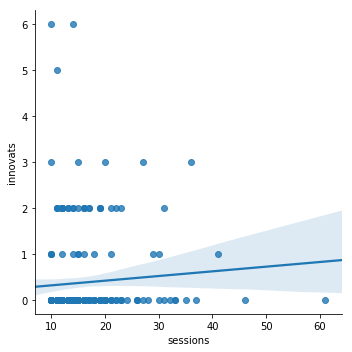

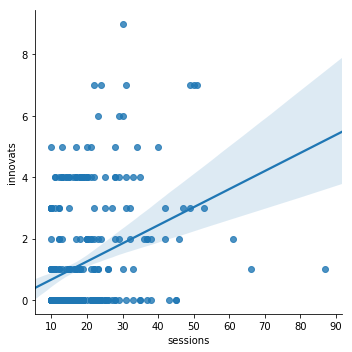

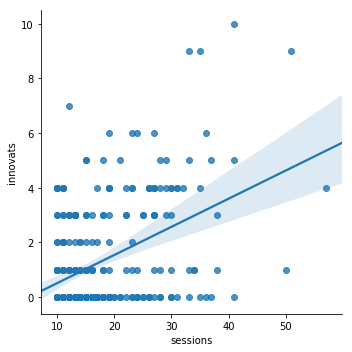

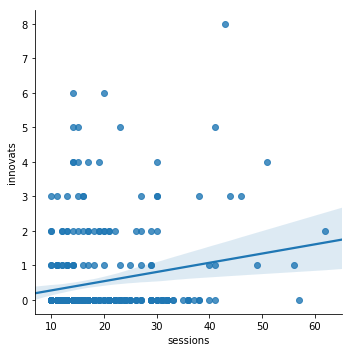

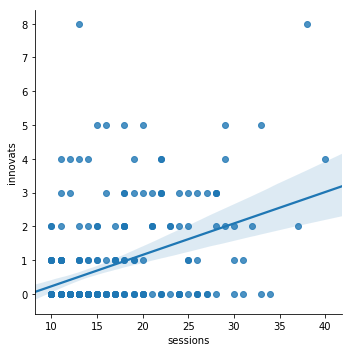

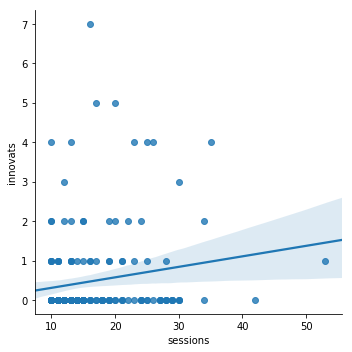

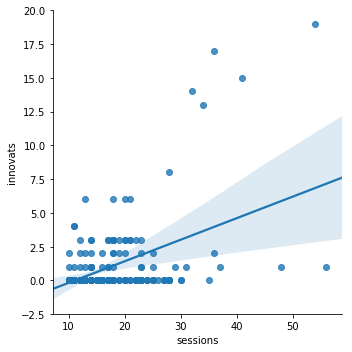

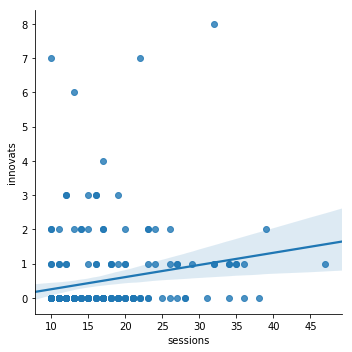

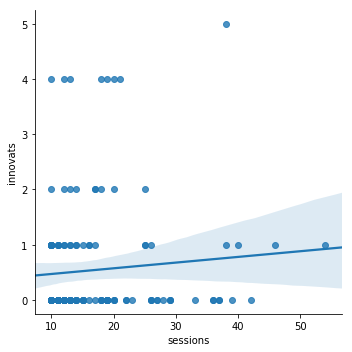

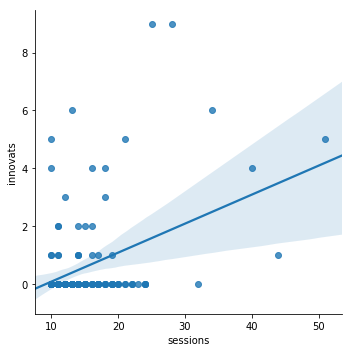

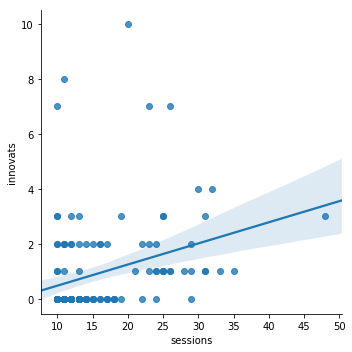

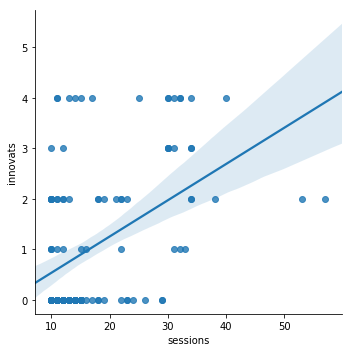

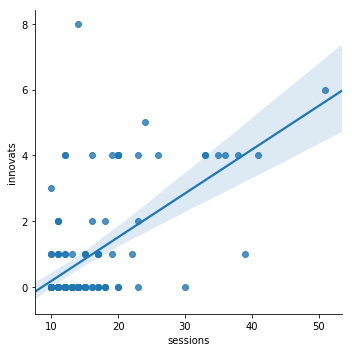

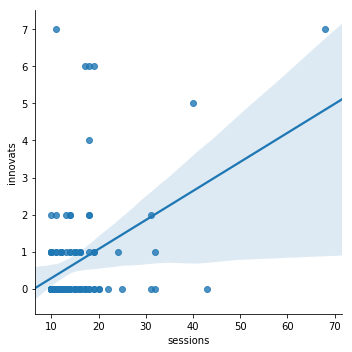

In [35]:
for dataframe in dataframes_dict:
    data = dataframes_dict[dataframe]
    sns.lmplot(data= data, x="sessions", y="innovats")
    

/home/tirta/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



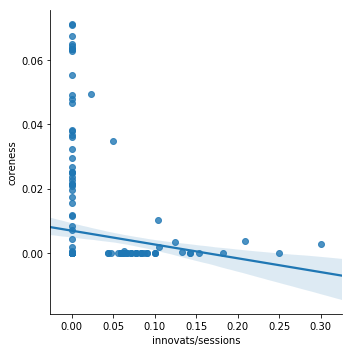

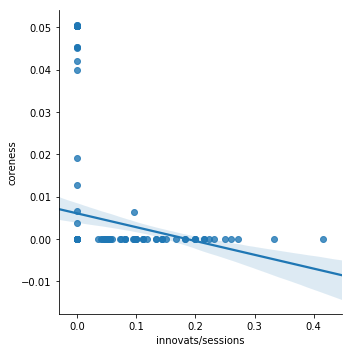

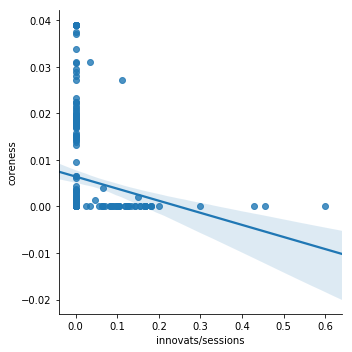

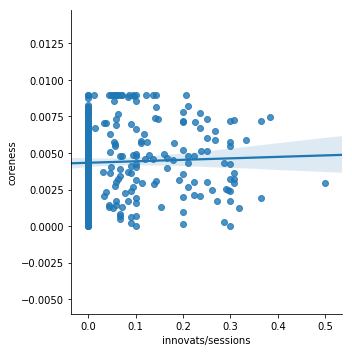

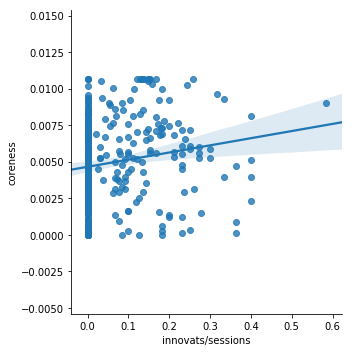

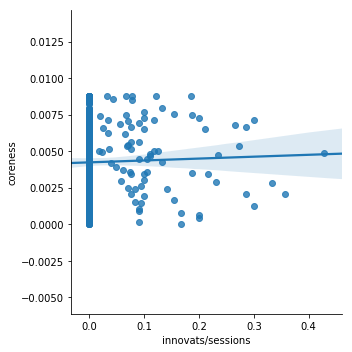

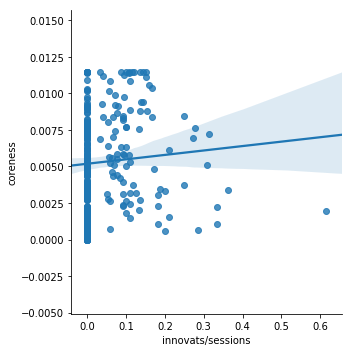

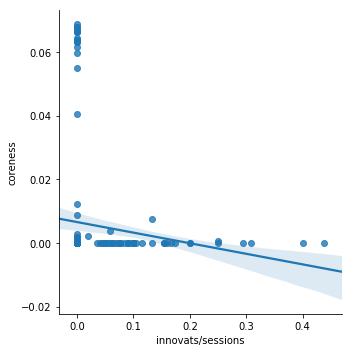

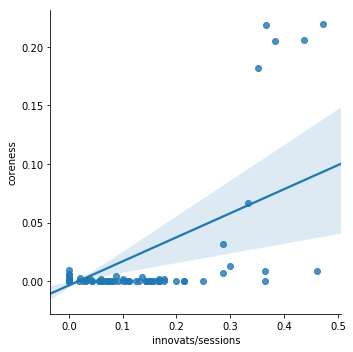

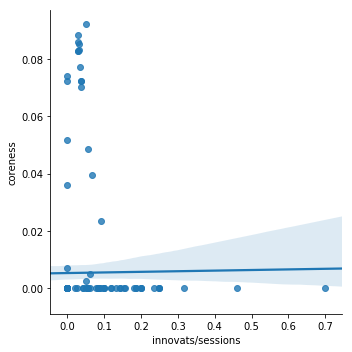

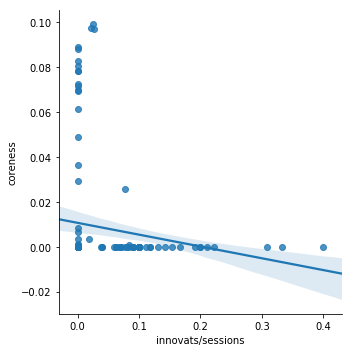

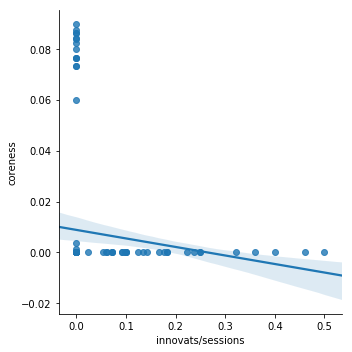

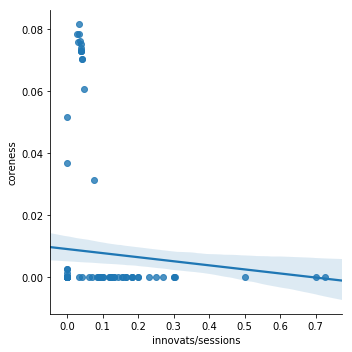

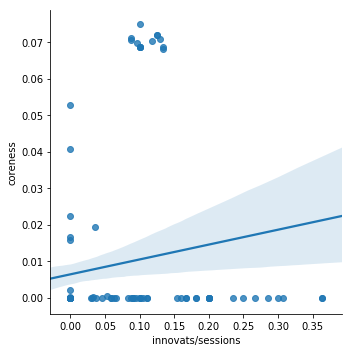

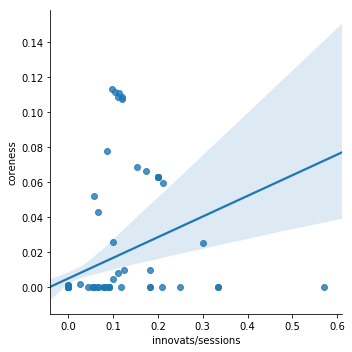

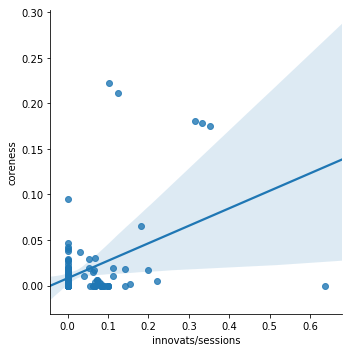

In [40]:
for dataframe in dataframes_dict:
    data = dataframes_dict[dataframe]
    sns.lmplot(data= data, x="innovats/sessions", y="coreness")
    

/home/tirta/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



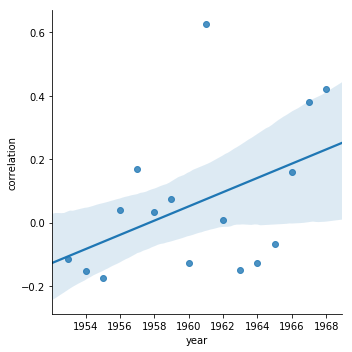

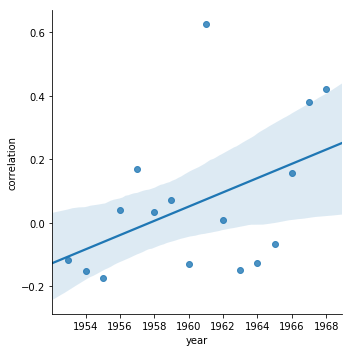

In [36]:
for dataframe in data_corr:
    data = data_corr
    sns.lmplot(data= data, x="year", y="correlation")

/home/tirta/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



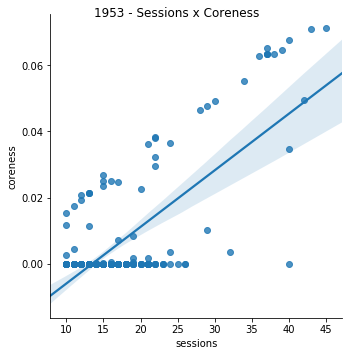

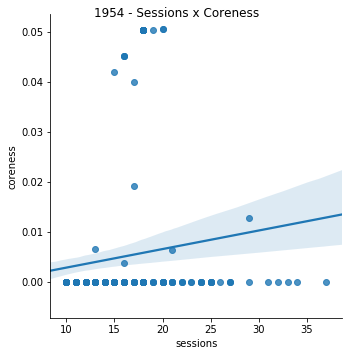

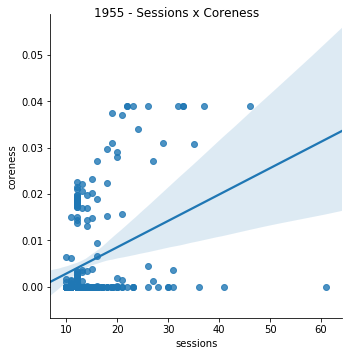

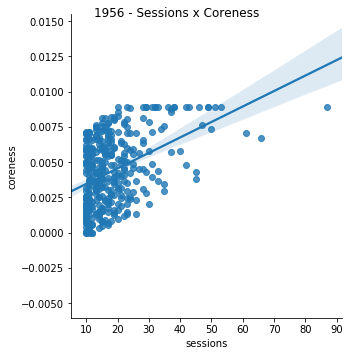

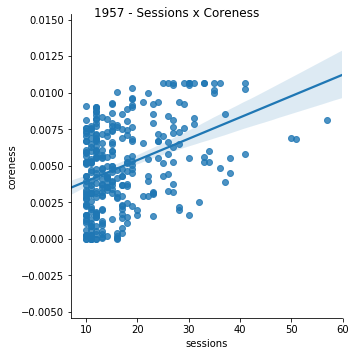

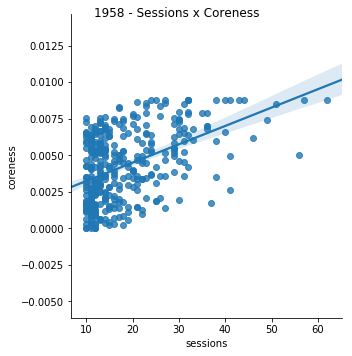

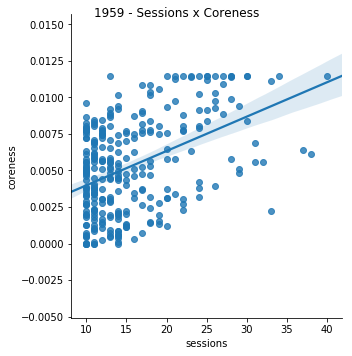

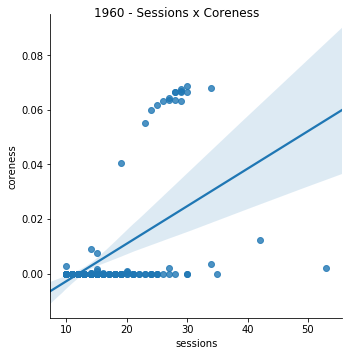

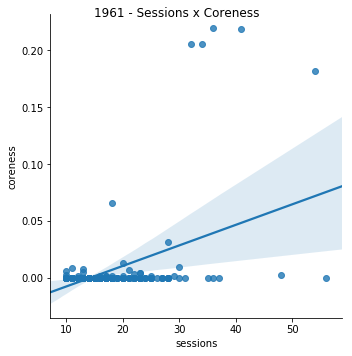

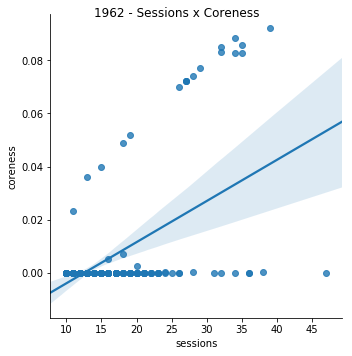

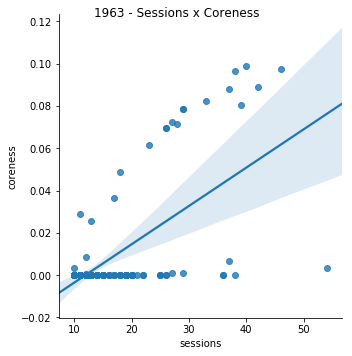

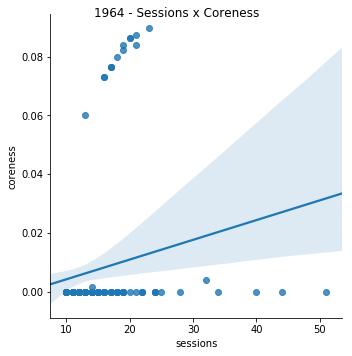

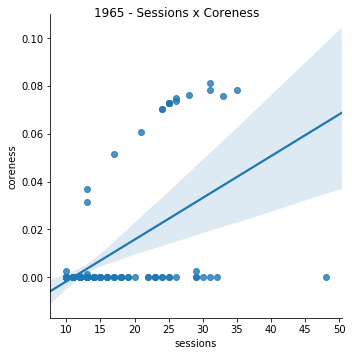

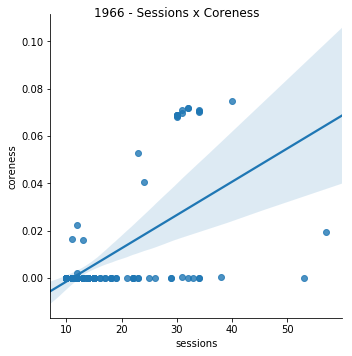

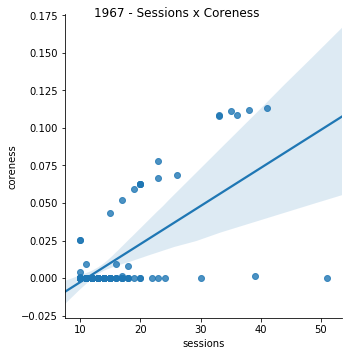

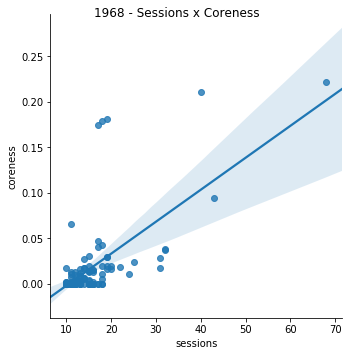

In [42]:
for year in dataframes_dict:
    data = dataframes_dict[year]
    g = sns.lmplot(x="sessions", y="coreness", data=data)
    g.fig.suptitle('{0} - Sessions x Coreness'.format(year))

In [ ]:
sessions_innovats = data.plot.scatter(
    x="sessions",
    y="innovats",
    c="coreness",
    colormap="winter",
    title="Total de Sessões x Sessões com Inovação",
    xlim=(min(data.sessions) - 1,max(data.sessions) + 1),
    ylim=(min(data.innovats) - 1,max(data.innovats) + 1),
    sharex=False)

In [ ]:
data[data.innovats>0].sort_values(by="innovats/sessions", ascending=False).head(10)

Como podemos analisar essa relação de forma mais analítica?


## Das análises à revisão da teoria

Muitas vezes, em um método científico lógico-dedutivo, geramos hipóteses que esperamos corroborar, e não estamos prontos para enfrentar resultados que fujam daquilo que é esperado. Por exemplo: deduzimos a hipótese de que a força da gravidade age de forma homogênea: corpos lançados simultaneamente de uma certa altura deverão cair na mesma velocidade. Se o experimento é “bem realizado”, obtemos o mesmo tempo de percurso de queda. Se os corpos chegam em momentos distintos, é possível que redesenhemos o experimento até acharmos o que esperamos. Por exemplo: se lançarmos uma bola de chumbo e uma folha de papel aberta de um prédio, é óbvio que a bola de chumbo chegará mais rápido. Mas fomos “treinados” a refazer o experimento e tomar algum objeto comparável à bola de chumbo, do que modelar a resistência do ar à folha de papel.

Entretanto, os resultados de um experimento ou de uma pesquisa podem “falhar” em corroborar as hipóteses desenvolvidas e dar pistas que nossa teoria não é completa. Esse é o final do ciclo de investigação científica e corresponde aos passos **4 (Interpretação dos resultados na linguagem de SNA) e 5 (Extrapolação/generalização dos resultados, reinterpretação do contexto, identificação de implicações e próximos passos)** de nosso curso. Antes de definir e dar diretrizes para esses passos, oferecemos um exemplo de uma pesquisa que realizou esses últimos passos.

Nosso exemplo se inicia com a diferença entre “laços fortes” e “laços fracos”, uma das teorias centrais na Sociologia (ver Granovetter, 1977). Essa teoria traz as seguintes ideias conectadas:

1.	Há diferença entre “laços fracos” e “laços fortes”. “Laços fortes” são relacionamentos com as pessoas próximas, íntimas; “laços fracos”, em contraste, são relacionamentos onde o elemento “confiança” não é tão forte.

2.	É preciso confiança para confidenciar assuntos sérios.

3.	Logo, as pessoas confidenciam assuntos sérios com laços fortes.

A partir dessa estrutura “dedutiva”, a pesquisa de “capital social” cresceu e desenvolveu uma ampla gama de ferramentas e abordagens, incluindo a “Core Discussion Network” (CDN), que foi incluído no censo americano (Burt, 1984). Através dessa ferramenta, se pergunta “com quem você discute assuntos importantes” e através dessa pergunta se identifica as pessoas que são “laços fortes” do entrevistado. Com o tempo, passou-se a inverter a ordem:

1.	CDN explicita laços fortes.

2.	Laços fortes do CDN serão ativados para confidências de assuntos importantes.

Mario Luis Small (2013) investigou de que forma o CDN muda no tempo. Seu intuito inicial era apenas explorar de que forma as pessoas eram agregadas ou expulsas da rede de laços fortes identificada através do CDN. Entretanto, ele percebeu que havia algumas inconsistências:

* Nem todos os “assuntos importantes” eram realmente “confidências” (Bearman & Parigi, 2004). Por exemplo, falar sobre “política” (um assunto importante que nem sempre se abre para um colega do trabalho) é muito diferente de falar sobre “divórcio” (um assunto emocionalmente forte que implicava em um grau de intimidade e confiança muito alto).

* Nem sempre as pessoas confidenciavam assuntos realmente importantes com as pessoas próximas citadas no CDN. Muitas vezes, Small percebeu, as pessoas preferiam falar sobre a possibilidade de abandonar o doutorado com um doutorando mais ou menos desconhecido na mesa do bar do que falar sobre isso com os pais.

* Ou seja: é possível confidenciar assuntos importantes com “laços fracos” não incluídos no CDN.

Essa descoberta (passo **4** em nosso ciclo), trazia uma série de problemas para a teoria. Se é possível tomar um laço fraco como confidente, isso significa que não há diferença entre “laços fracos” e “laços fortes”? Um dos pilares da Sociologia parecia se instabilizar.

A partir desses achados, Mario Luis Small percebeu que havia sérias limitações na pesquisa (nosso passo **5**: extrapolação/generalização dos resultados, reinterpretação do contexto, identificação de implicações e próximos passos). Sabia-se que “laços fracos” eram eventualmente confidentes, mas não se sabia porque isso ocorria. Por isso, foi levado a realizar uma pesquisa qualitativa com vários doutorandos (Small, 2017). Ele descobriu que havia algumas circunstâncias que levavam os alunos a confidenciarem com “desconhecidos” ao invés de pessoas próximas:

* situações onde a pessoa próxima estava distante geograficamente;
* situações onde havia o risco de pessoas próximas falarem os segredos para outras pessoas próximas;
* situações onde as pessoas próximas não conheciam bem o assunto e isso poderia levar a conselhos ruins ou expectativas distorcidas.

Frente a essas situações, “estranhos” eram escolhidos quando:

* estavam disponíveis;
* conheciam o assunto e por isso poderiam dar conselhos relevantes;

Vemos um movimento de “ida e volta” do passo 5 à realização de uma nova pesquisa (passos 1 a 4), para obter-se novos resultados, até que as novas interpretações permitam a articulação dos achados em uma nova teoria mais geral. Voltando ao contexto dessa pesquisa, as novas descobertas não invalidam a teoria anterior, mas complementam.

O último ciclo quando ingressa no passo 5 traz a seguinte revisão à teoria:

* laços fortes ainda são utilizados para muitos temas importantes e confidências, mas não para todos os assuntos importantes e confidências. 
* as situações que exigem a confidência a estranhos são aquelas onde esses “confidentes” estão próximos, disponíveis e entendem do assunto em questão
* isso implica em uma escolha que é guiada por algum tipo de “cálculo” do indivíduo que busca se aconselhar

Podemos agora definir e explicitar o que ocorre nesses últimos passos. Para os três primeiros, vocês tiveram *scaffold*. Para estes dois últimos, terão que escrever e entregar!

### 4: Interpretação dos resultados na linguagem de SNA (Social Network Analysis)

A partir dos resultados obtidos das análises, descreva o que está acontecendo. Isso inclui explicitar:

•	quais hipóteses foram corroboradas<br>
•	quais hipóteses foram rejeitadas<br>
•	trazer análises suplementares que testem a robustez dos achados<br>
•	Buscar situações onde as hipóteses corroboradas poderiam ser rejeitadas (condições de fronteira)<br>
•	Identificar situações alternativas que também corroboram as hipóteses<br>

Essa interpretação pode ser feita a partir da citação dos dados obtidos nas análises e não precisa ser “didática”. Basta um “de para” dos resultados às hipóteses originalmente elaboradas para guiar o leitor.

Olhando os gráficos, menos coreness, mais chance de inovação
Hipótese 1: músicos no centro da rede apresentam maiores chances de inovar
Hipótese 2: músicos na periferia da rede apresentam maiores chances de inovar
hipotese 1 rejeitada
!!!analises suplementares??!!!
alguns anos tem inovação com coreness alta
alguns anos sem inovação

### 5: Extrapolação/generalização dos resultados, reinterpretação do contexto, identificação de implicações e próximos passos

A partir da interpretação técnica realizada, nesse passo se procede uma discussão do que isso significa à luz do que foi elaborado nos passos 1 e 2 originalmente:

* Por que houve hipóteses rejeitadas? Isso diz respeito ao contexto específico onde foram testadas?

* Há explicações alternativas ou motivos obscuros para algo acontecer que justificaria pesquisas futuras? Essas indagações remetem às limitações da pesquisa.

* Os achados permitem aprimorar a teoria? Por exemplo, na pesquisa citada, agregou-se situações específicas e a escolha individual que se origina na interpretação da situação e avaliação das alternativas existentes.

## Referências

Bearman, P., & Parigi, P. (2004). Cloning headless frogs and other important matters: Conversation topics and network structure. Social Forces, 83(2), 535-557.

Burt, R. S. (1984). Network items and the general social survey. Social networks, 6(4), 293-339.

Granovetter, Mark S. "The strength of weak ties." Social networks. 1977. 347-367.

Small, M. L. (2013). Weak ties and the core discussion network: Why people regularly discuss important matters with unimportant alters. Social networks, 35(3), 470-483.

Small, M. L. (2017). Someone to Talk to. Oxford University Press.

### Observações